# first import libraries



from google.colab import drive
drive.mount('/content/drive')

In [5]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob as gb
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os
os.chdir("/content/drive/")
!ls

MyDrive  Shareddrives



# check the Train folder

In [8]:

import os
import glob as gb

trainpath = '/content/drive/MyDrive/dl_project/Training'

for folder in os.listdir(trainpath):
    files = gb.glob(pathname=os.path.join(trainpath, folder, '*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')


For training data, found 1321 in folder glioma
For training data, found 1339 in folder meningioma
For training data, found 1595 in folder notumor
For training data, found 1457 in folder pituitary


# check the test folder

In [9]:
import os
import glob as gb

testpath = '/content/drive/MyDrive/dl_project/Testing'

for folder in os.listdir(trainpath):
    files = gb.glob(pathname=os.path.join(testpath, folder, '*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')


For training data, found 300 in folder glioma
For training data, found 306 in folder meningioma
For training data, found 405 in folder notumor
For training data, found 300 in folder pituitary


In [10]:
code = {'glioma' : 0 , 'meningioma' : 1, 'notumor' : 2 , 'pituitary' : 3  }
#create a dictionary with their names & index , also create a function to get the index back
def convert_code (k):
    for x , y in code.items():
        if y == k :
            return x

In [11]:
import os
import cv2
import glob as gb
X_train = []
y_train = []

for folder in os.listdir(os.path.join(trainpath)):
    folder_path = os.path.join(trainpath, folder)
    files = gb.glob(os.path.join(folder_path, '*.jpg'))

    for file in files:
        image = cv2.imread(file)
        X_train.append(image)
        y_train.append(code[folder])

In [12]:
print(f'we have {len(X_train)} items in X_train')

we have 5712 items in X_train


 we have have a look to random pictures in X_train , and to adjust their title using the y valu

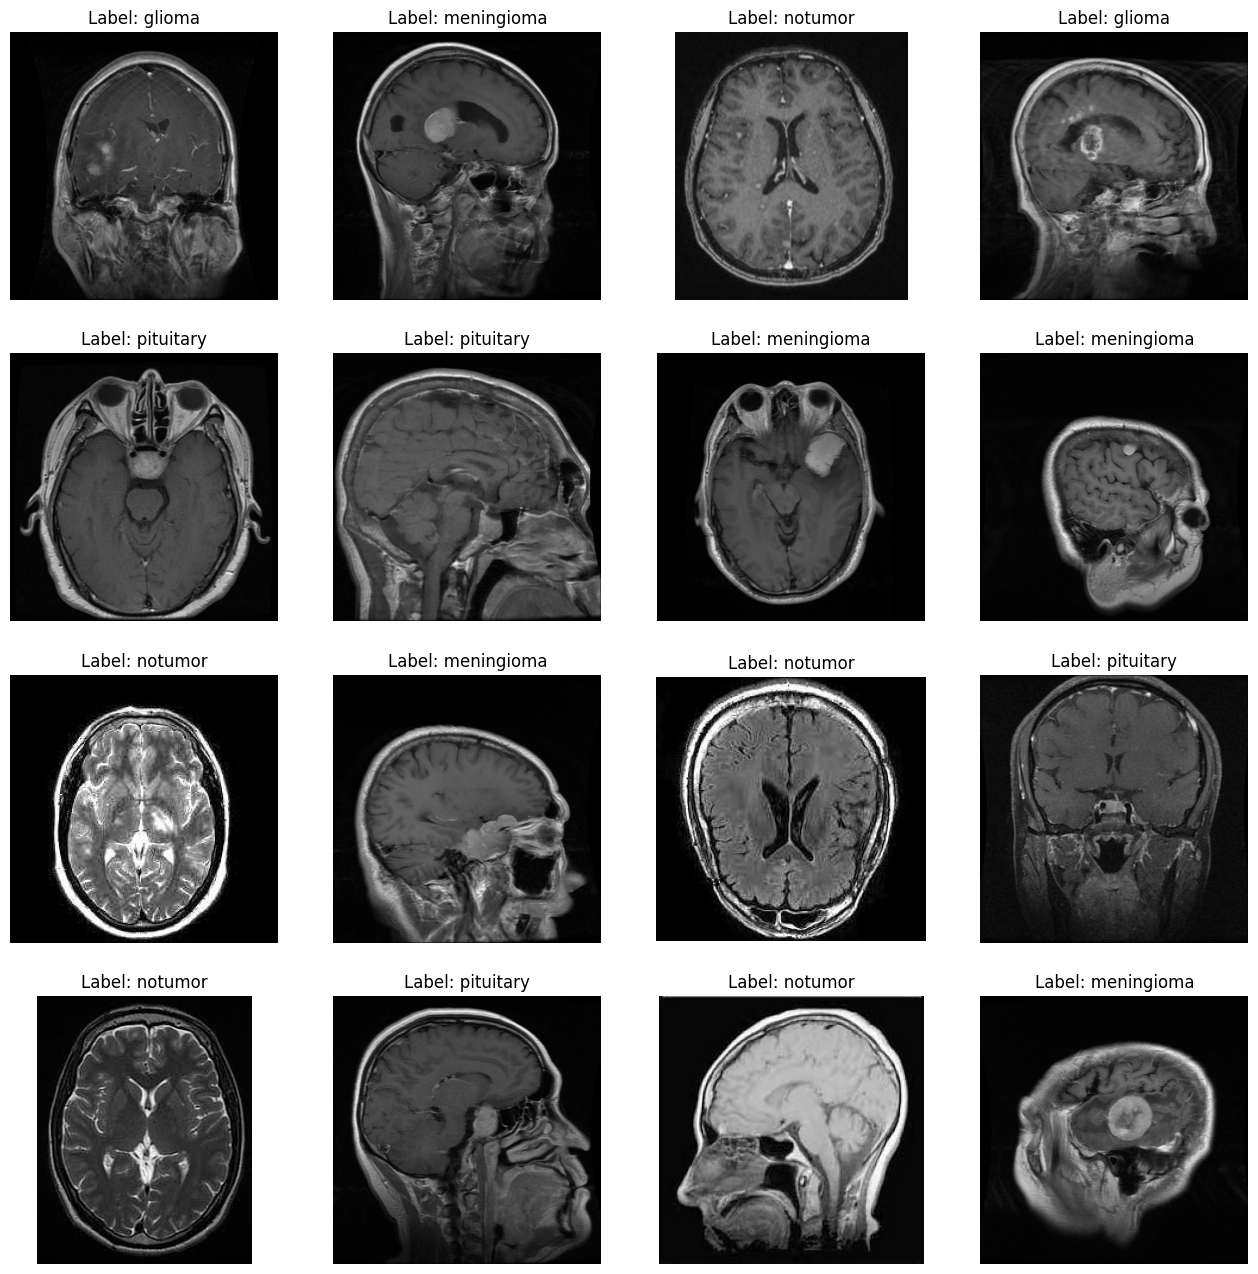

In [13]:
plt.figure(figsize=(16,16))
for ax , i in enumerate(list(np.random.randint(0,len(X_train),16))) :
    plt.subplot(4,4,ax+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title('Label: '+convert_code(y_train[i]))

In [14]:
X_test = [] # testing Dataset
y_test = [] # testing Labels
for folder in  os.listdir(trainpath) :
    files = gb.glob(pathname= str( trainpath +'Training//' + folder + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        X_train.append(list(image))
        y_train.append(code[folder])

we have have a look to random pictures in x_test , and to adjust their title using the y valu

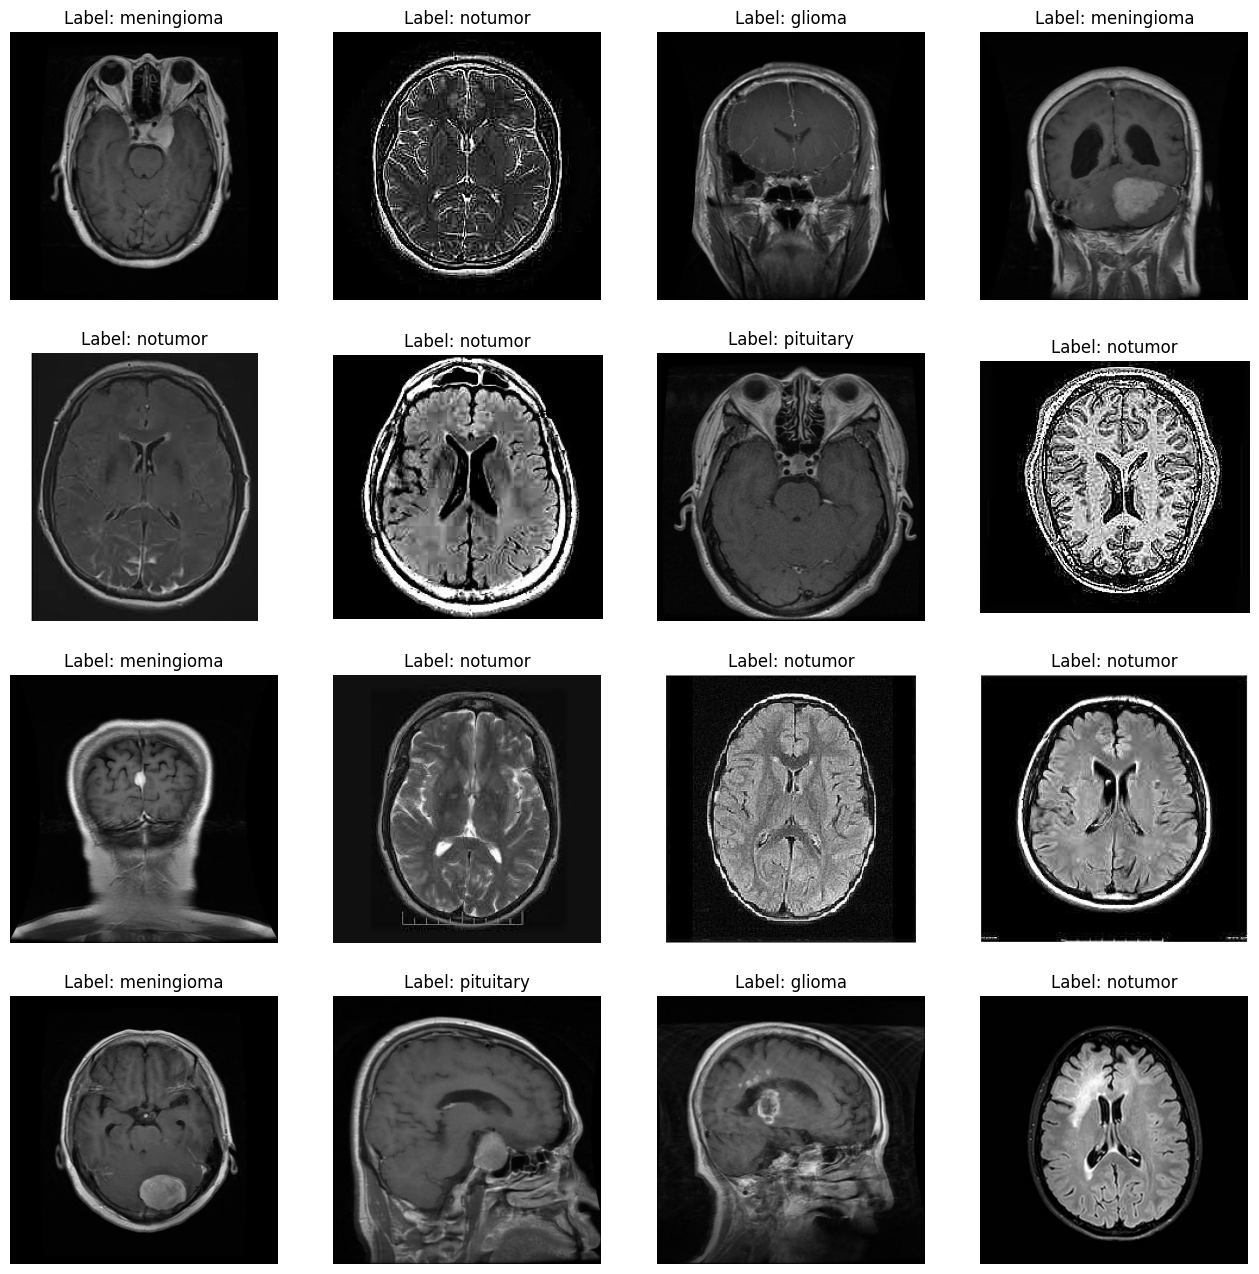

In [15]:
plt.figure(figsize=(16,16))
for ax , i in enumerate(list(np.random.randint(0,len(X_train),16))) :
    plt.subplot(4,4,ax+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title('Label: '+convert_code(y_train[i]))

# Build CNN model

In [16]:
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Full connect layers

model.add(Dense(units= 1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [16]:
model.save('/content/drive/MyDrive/Deep learning/GK12.h5')

In [17]:
generator_train = ImageDataGenerator(rescale=1./255)

generator_test = ImageDataGenerator(rescale=1./255)

s = 200

train = generator_train.flow_from_directory('/content/drive/MyDrive/dl_project/Training', target_size=(s, s),batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('/content/drive/MyDrive/dl_project/Testing', target_size=(s, s),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      3200      
                                                                 
 batch_normalization (Batch  (None, 200, 200, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     401536    
                                                                 
 batch_normalization_1 (Bat  (None, 100, 100, 128)     512       
 chNormalization)                                                
                                                        

In [22]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define callback functions
early_stopping = EarlyStopping(monitor='loss', min_delta=1e-11, patience=6, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=6, verbose=1)
model_checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/Deep learning/GK12.h5', monitor='val_categorical_accuracy',
                                    save_best_only=True, verbose=1)

# Train the model with callbacks
history = model.fit(train, epochs=5, validation_data=test, validation_steps=1311 // 32,
                    callbacks=[early_stopping, reduce_lr, model_checkpoint])


Epoch 1/5
179/179 [==============================] - ETA: 0s - loss: 0.2508 - categorical_accuracy: 0.9077
Epoch 1: val_categorical_accuracy improved from -inf to 0.68906, saving model to /content/drive/MyDrive/Deep learning/GK12.h5
179/179 [==============================] - 40s 223ms/step - loss: 0.2508 - categorical_accuracy: 0.9077 - val_loss: 0.7486 - val_categorical_accuracy: 0.6891 - lr: 0.0010
Epoch 2/5
179/179 [==============================] - ETA: 0s - loss: 0.1987 - categorical_accuracy: 0.9251
Epoch 2: val_categorical_accuracy improved from 0.68906 to 0.89141, saving model to /content/drive/MyDrive/Deep learning/GK12.h5
179/179 [==============================] - 36s 199ms/step - loss: 0.1987 - categorical_accuracy: 0.9251 - val_loss: 0.2763 - val_categorical_accuracy: 0.8914 - lr: 0.0010
Epoch 3/5
179/179 [==============================] - ETA: 0s - loss: 0.1561 - categorical_accuracy: 0.9450
Epoch 3: val_categorical_accuracy improved from 0.89141 to 0.95469, saving model t

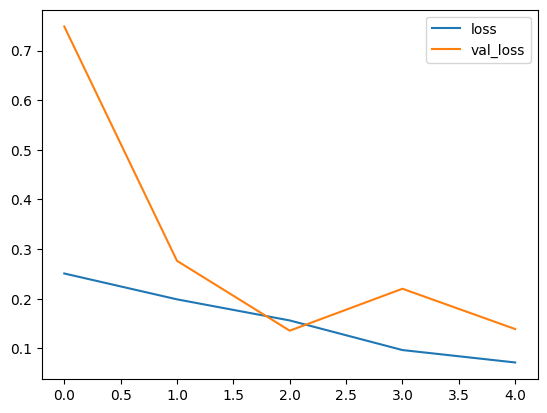

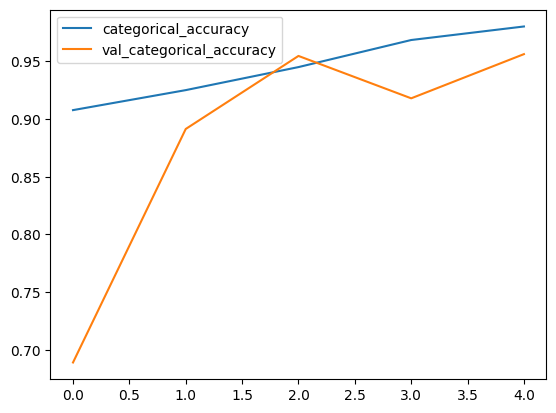

In [23]:

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['categorical_accuracy','val_categorical_accuracy']].plot();

# evaluate the model in real

In [24]:
from tensorflow.keras.models import load_model


In [25]:
new_model= load_model('/content/drive/MyDrive/Deep learning/GK12.h5')

In [26]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [27]:
import numpy as np

In [28]:
# Load the image
img_path = "/content/drive/MyDrive/dl_project/Testing/glioma/Te-gl_0010.jpg"
img = load_img(img_path, target_size=(200, 200), grayscale=True)

# Convert the image to a numpy array
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Normalize the pixel values
x = x / 255.0

# Make the prediction
prediction = new_model.predict(x)

# Get the class label with the highest probability
predicted_class = np.argmax(prediction)

# Print the predicted tumor type
if predicted_class == 0:
    print("Glioma")
elif predicted_class == 1:
    print("Meningioma")
elif predicted_class == 2:
    print("No tumor")
elif predicted_class == 3:
    print("Pituitary")
else:
    print("Unknown class label")

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 1s 563ms/step
Glioma
